In [1]:
from __future__ import division
from textblob import TextBlob
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv(open('data/tripReports.csv','rU'), encoding='utf-8', engine='c')

In [3]:
df.describe()

,HikeId,AuthorId,TextBlobSentiment,Rating
count,78042.000000,78042.000000,77296.000000,77296.000000
mean,694.884152,9592.814677,0.167091,2.999224
std,1216.565876,5624.032233,0.130328,1.415046
min,0.000000,0.000000,-1.000000,1.000000
25%,177.000000,4827.250000,0.089664,2.000000
50%,435.000000,9374.000000,0.153205,3.000000
75%,928.000000,14297.000000,0.228125,4.000000
max,19614.000000,19633.000000,1.000000,5.000000


## Sentiment analysis

{'boxes': [<matplotlib.lines.Line2D at 0x119055fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x119064e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11907c190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119070b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119064150>,
  <matplotlib.lines.Line2D at 0x119064810>]}

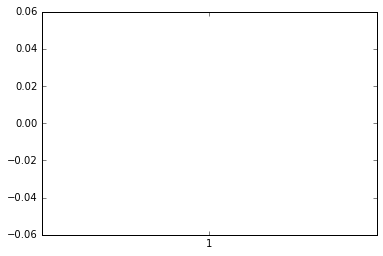

In [8]:
plt.boxplot(df.TextBlobSentiment)

## Using Dato Graphlab sentiment analysis:

https://turi.com/products/create/docs/generated/graphlab.sentiment_analysis.create.html#graphlab.sentiment_analysis.create


In [9]:
import graphlab as gl

In [12]:
df = df.dropna()
df['HikeId'] = df['HikeId'].fillna(np.nan).astype(int)
df['AuthorId'] = df['AuthorId'].fillna(np.nan).astype(int)
sf = gl.SFrame(df)

In [13]:
m = gl.sentiment_analysis.create(sf, features=['Text'])


In [14]:
df['GraphLabSentiment'] = m.predict(sf)

In [ ]:
df.head()

In [15]:
df.describe()

,HikeId,AuthorId,TextBlobSentiment,Rating,GraphLabSentiment
count,77287.000000,77287.000000,77287.000000,77287.000000,7.728700e+04
mean,602.194884,9685.642682,0.167110,2.999457,9.560600e-01
std,551.279197,5570.966700,0.130323,1.414963,1.489380e-01
min,0.000000,1.000000,-1.000000,1.000000,3.847551e-09
25%,176.000000,5070.000000,0.089714,2.000000,9.934390e-01
50%,430.000000,9441.000000,0.153214,3.000000,9.998582e-01
75%,917.000000,14355.000000,0.228125,4.000000,9.999995e-01
max,3364.000000,19633.000000,1.000000,5.000000,1.000000e+00


## Attempting GraphLab's sentiment analysis with scraped TR training data

In [ ]:
training = pd.read_csv('data/')